In [57]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [59]:
# 2. Load the dataset
df = pd.read_csv("ChildBehaviourAnalysis.csv")
print("Shape:", df.shape)
df.head(5)

Shape: (200, 9)


,Age,Gender,Sleep_Hours,Study_Hours,Play_Hours,Screen_Time,Meals_Per_Day,Mood,Behavior_Category
0,14,Female,8.9,3.0,1.0,0.3,5,Angry,Healthy
1,6,Female,8.8,2.1,1.0,0.3,4,Happy,Healthy
2,11,Female,8.4,3.5,1.3,0.9,3,Happy,Healthy
3,14,Male,8.8,3.5,1.2,0.9,4,Happy,Healthy
4,9,Male,9.3,3.6,1.2,0.6,5,Happy,Healthy


In [61]:
numerical_col = [i for i in df.columns if df[i].dtype in ['int64', 'float64']]
print(numerical_col)


['Age', 'Sleep_Hours', 'Study_Hours', 'Play_Hours', 'Screen_Time', 'Meals_Per_Day']


In [63]:
categorical_col = [col for col in df.columns if col not in numerical_col]

print(categorical_col)

['Gender', 'Mood', 'Behavior_Category']


 ### Numerical Variables Analysis

In [66]:
# Create directory for plots if it doesn't exist
os.makedirs('plots', exist_ok=True)

# Summary statistics
print(df[numerical_col].describe()) ## need to check if mean = median to check the data is normally distributed or not

              Age  Sleep_Hours  Study_Hours  Play_Hours  Screen_Time  \
count  200.000000   200.000000   200.000000  200.000000   200.000000   
mean    10.230000     6.971000     1.732000    2.238000     1.923500   
std      2.578828     1.427391     0.879113    0.818416     1.158581   
min      6.000000     4.100000     0.200000    0.500000     0.200000   
25%      8.000000     6.100000     1.100000    1.600000     1.100000   
50%     10.000000     7.000000     1.700000    2.300000     1.700000   
75%     12.000000     7.800000     2.300000    2.800000     2.300000   
max     14.000000     9.900000     3.900000    4.000000     5.000000   

       Meals_Per_Day  
count      200.00000  
mean         2.61500  
std          0.94405  
min          1.00000  
25%          2.00000  
50%          3.00000  
75%          3.00000  
max          5.00000  


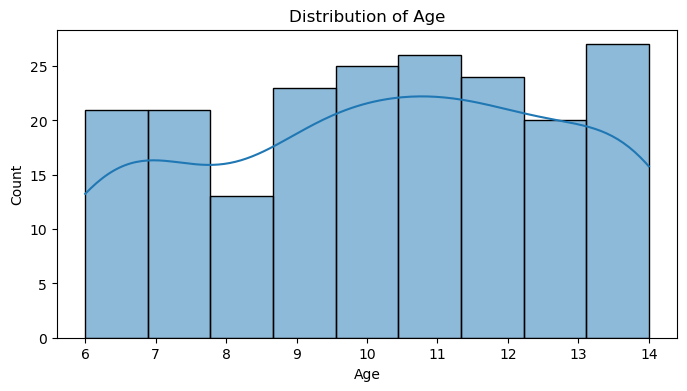

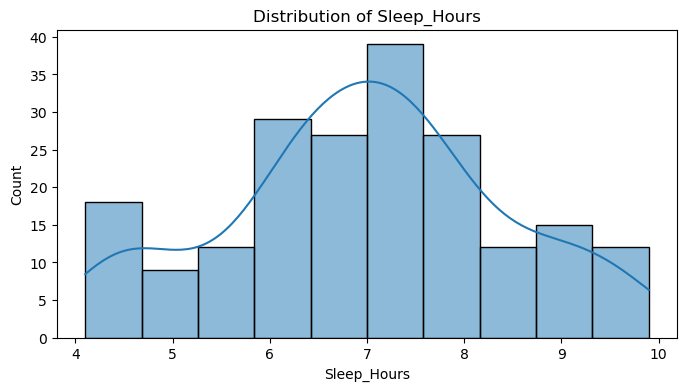

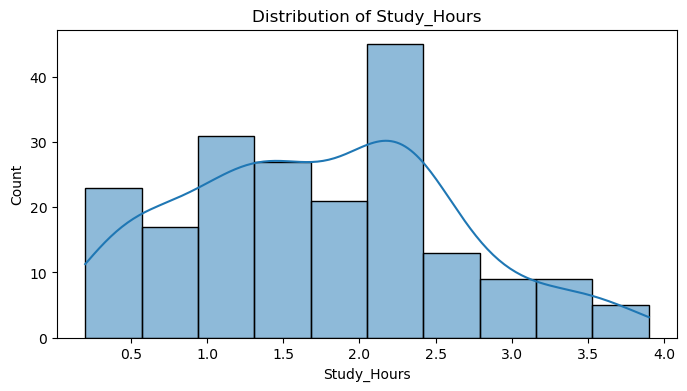

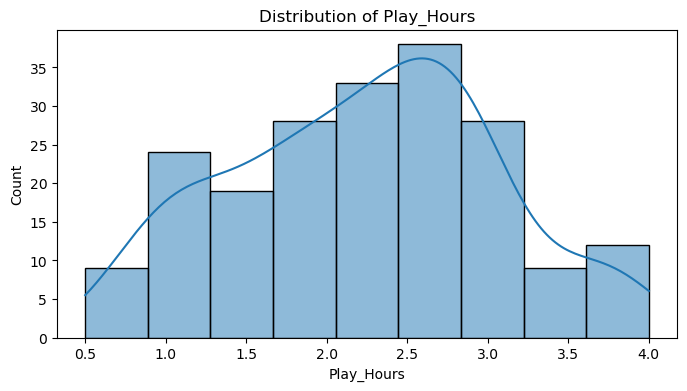

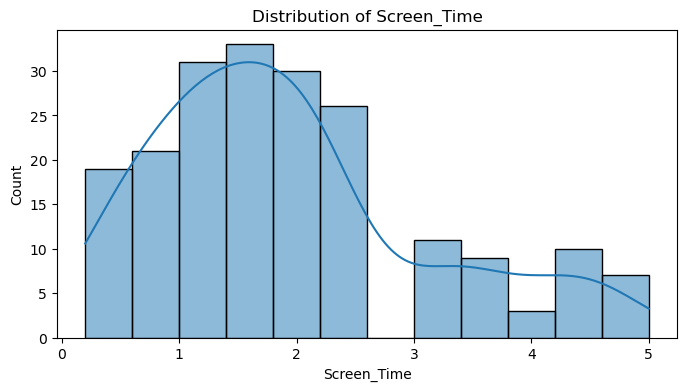

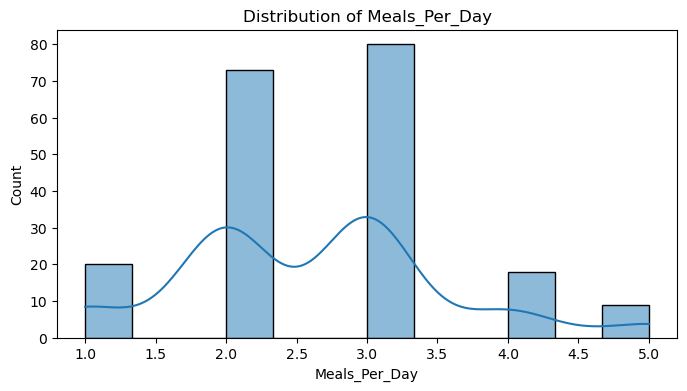

In [68]:
# Plot distributions
for col in numerical_col:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig(f'plots/{col}_distribution.png')
    plt.show()

### Categorical Variables Analysis

In [70]:
# Frequency tables
for col in categorical_col:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())


Gender Value Counts:
Gender
Male      102
Female     98
Name: count, dtype: int64

Mood Value Counts:
Mood
Angry    77
Happy    68
Sad      55
Name: count, dtype: int64

Behavior_Category Value Counts:
Behavior_Category
Needs Improvement    120
Healthy               40
Unhealthy             40
Name: count, dtype: int64


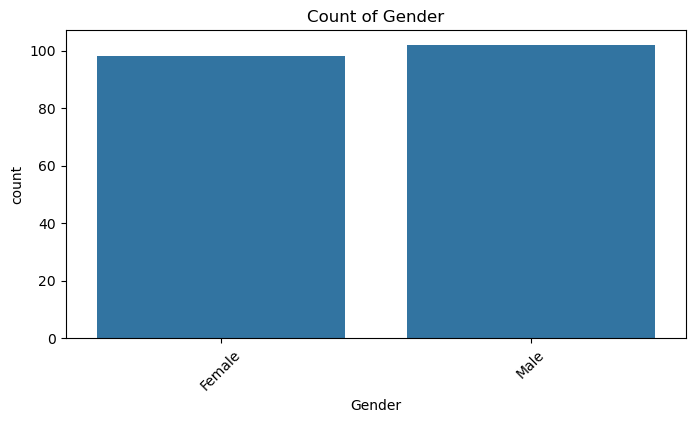

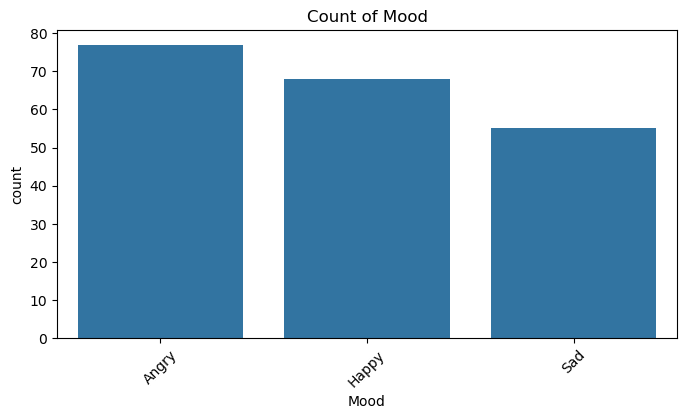

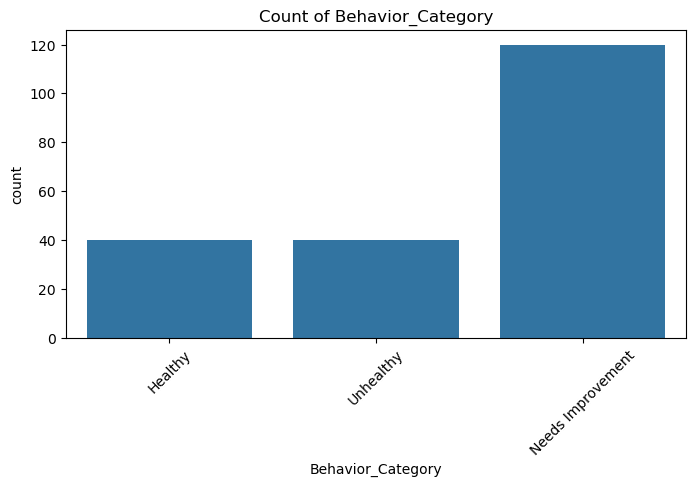

In [71]:
# Plot counts
for col in categorical_col:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.savefig(f'plots/{col}_counts.png')
    plt.show()

### Bivariate Analysis

In [73]:
# 1. Numerical vs Numerical
num_pairs = [('Age', 'Sleep_Hours'), 
             ('Study_Hours', 'Play_Hours'),
             ('Screen_Time', 'Sleep_Hours')]

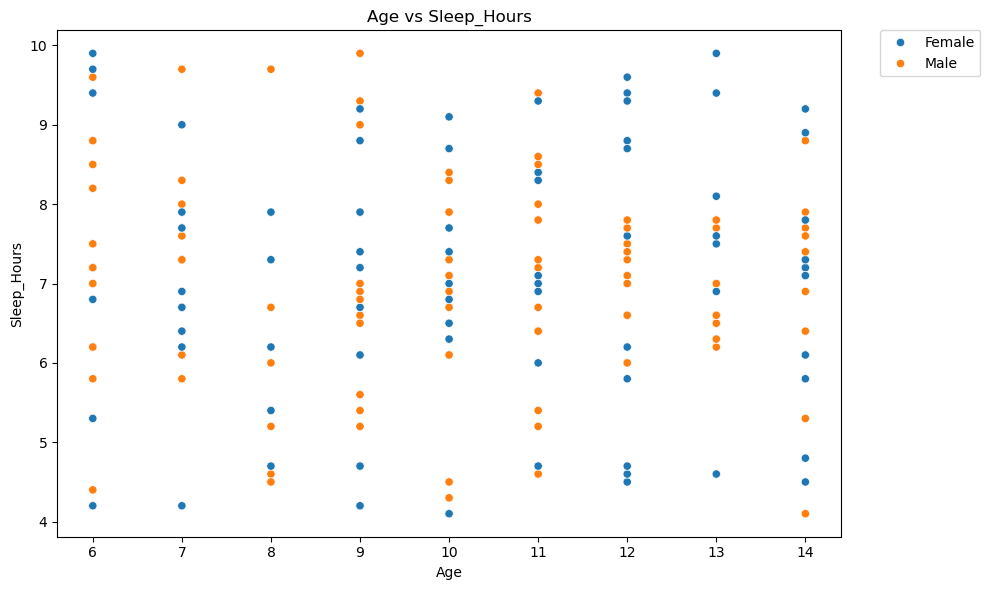

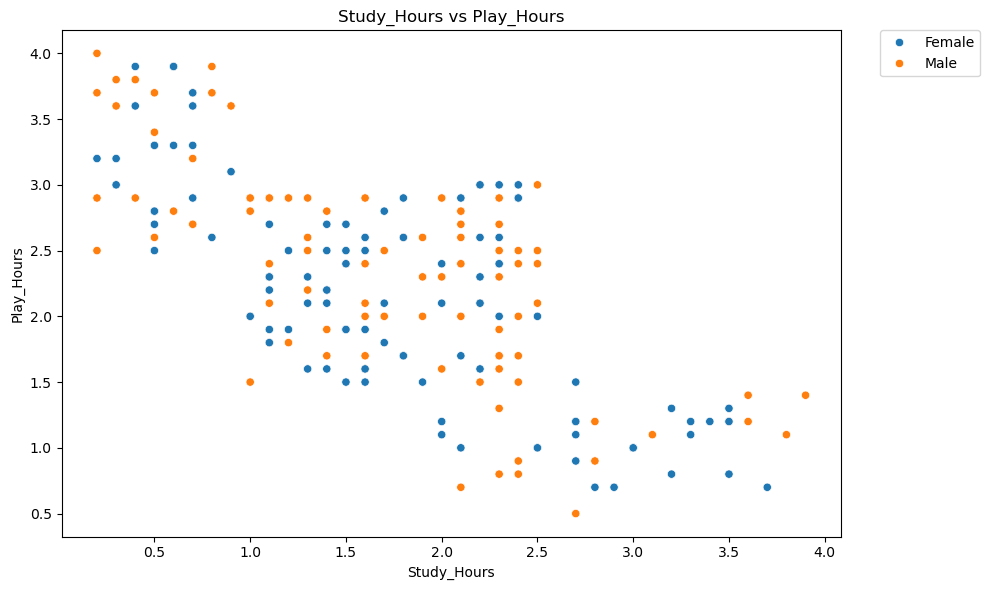

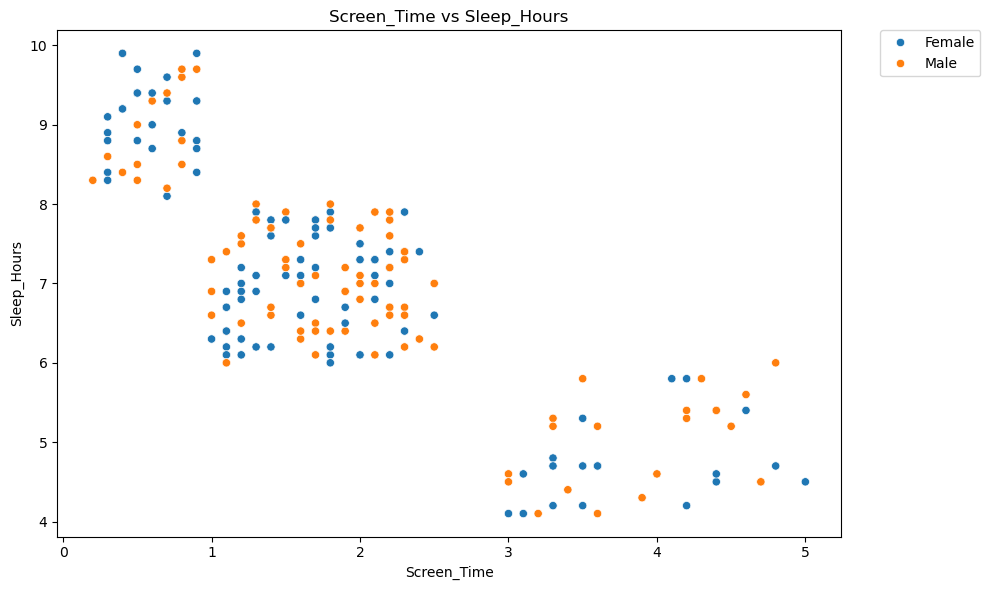

In [74]:
for x, y in num_pairs:
    plt.figure(figsize=(10,6))  # Increased width to accommodate legend
    ax = sns.scatterplot(data=df, x=x, y=y, hue='Gender')
    plt.title(f'{x} vs {y}')
     # Move legend outside right side of plot
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
    plt.tight_layout()  # Adjust layout to prevent cutoff
    plt.savefig(f'plots/{x}_vs_{y}.png', bbox_inches='tight')  # bbox_inches preserves legend
    plt.show()

In [75]:
#  # Calculate correlation
# print(f"\nCorrelation between {x} and {y}: {df[x].corr(df[y]):.2f}")

In [76]:
# 2. Numerical vs Categorical
cat_vars = ['Gender', 'Mood', 'Behavior_Category']
num_vars = ['Sleep_Hours', 'Study_Hours', 'Screen_Time']

<Figure size 800x500 with 0 Axes>

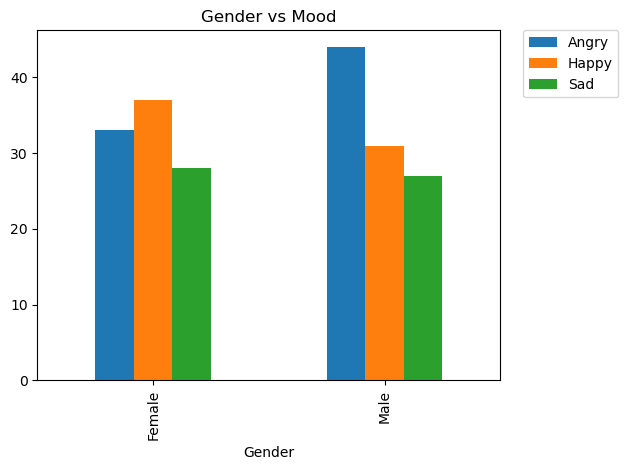

<Figure size 800x500 with 0 Axes>

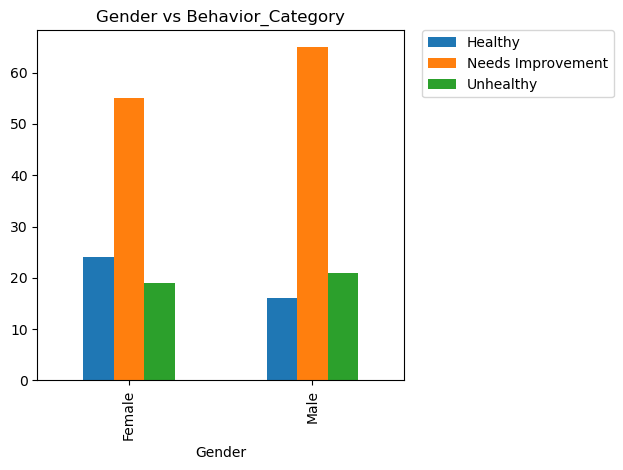

<Figure size 800x500 with 0 Axes>

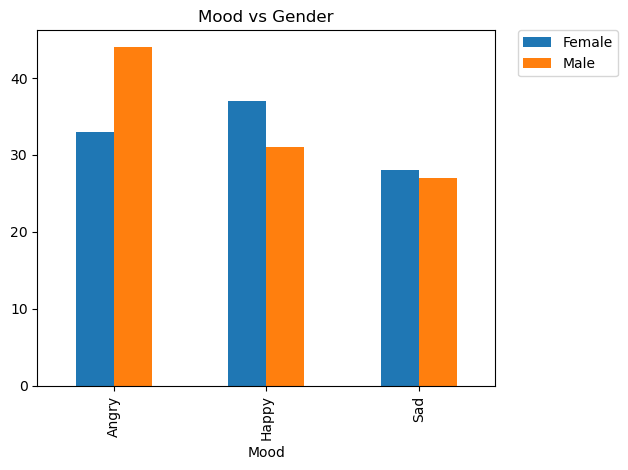

<Figure size 800x500 with 0 Axes>

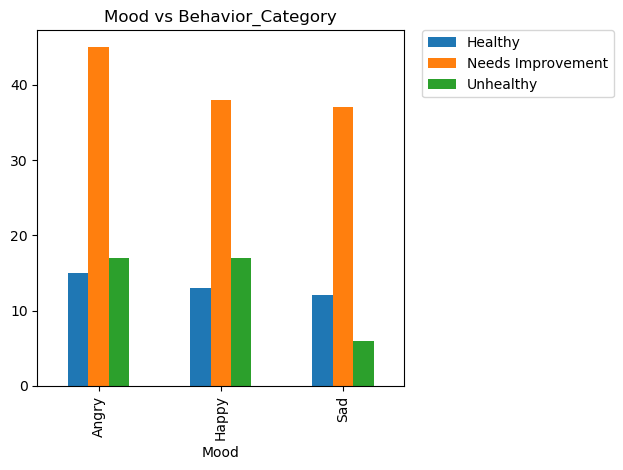

<Figure size 800x500 with 0 Axes>

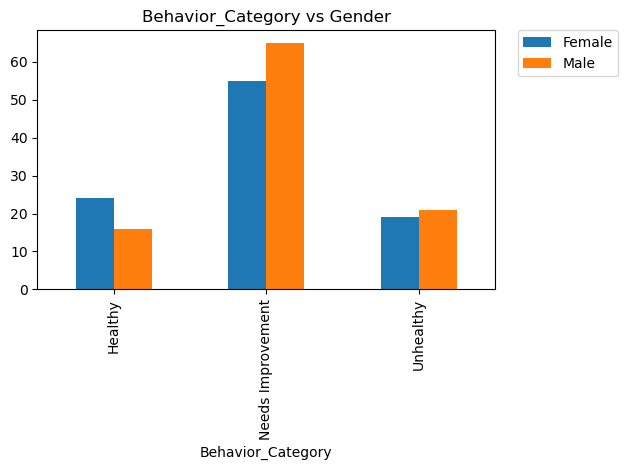

<Figure size 800x500 with 0 Axes>

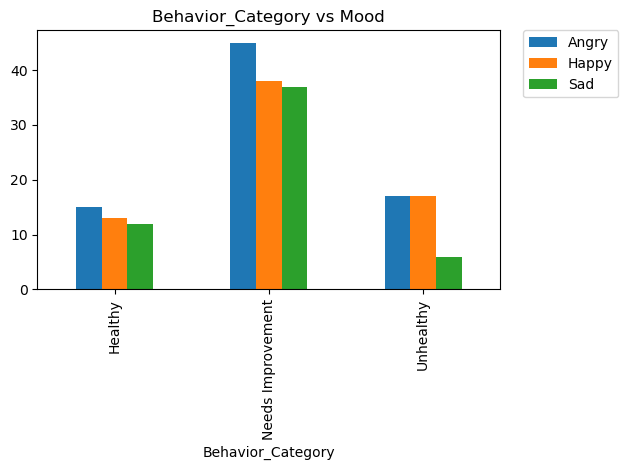

In [77]:
# 3. Categorical vs Categorical
for var1 in cat_vars:
    for var2 in cat_vars:
        if var1 != var2:
            plt.figure(figsize=(8,5))
            ax = pd.crosstab(df[var1], df[var2]).plot(kind='bar', stacked=False)
             # Move legend outside right side of plot
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
            plt.title(f'{var1} vs {var2}')
            plt.tight_layout()  # Adjust layout to prevent cutoff
            plt.savefig(f'plots/{var1}_vs_{var2}.png', bbox_inches='tight')  # bbox_inches preserves legend

In [78]:
df["Behavior_Category"].value_counts()  # Clearly shows here it is imbalanced dataset

Behavior_Category
Needs Improvement    120
Healthy               40
Unhealthy             40
Name: count, dtype: int64

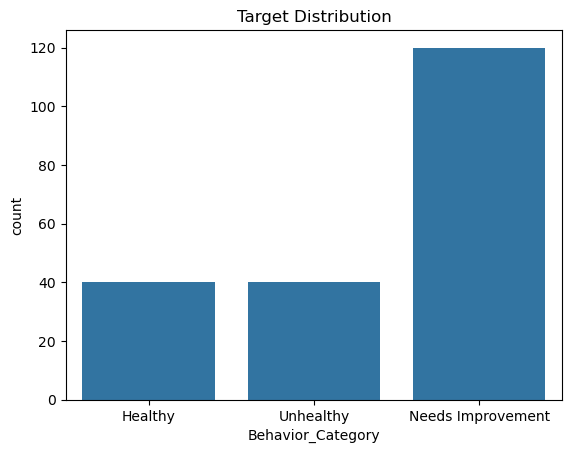

In [79]:
# EDA - Class distribution
sns.countplot(x="Behavior_Category", data=df)
plt.title("Target Distribution")
plt.show()